In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [3]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID439red_train.csv')
test = pd.read_csv('AID439red_test.csv')
test.head(5)

,POS_04_POS,POS_04_HBD,POS_07_HBD,POS_04_HBA,POS_06_HBA,POS_07_HBA,POS_02_ARC,POS_04_ARC,POS_05_ARC,POS_06_ARC,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.86103,3.150,104.10,4,2,2,357.483,0,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.70924,3.760,94.92,3,1,1,329.404,0,0,Active
2,0,0,0,0,0,0,0,0,0,0,...,4.12554,4.494,92.25,6,4,2,401.470,0,0,Inactive
3,0,0,0,0,0,0,0,0,0,0,...,4.08335,5.068,117.43,9,5,2,471.517,0,0,Inactive
4,0,0,0,0,0,0,0,0,0,0,...,4.05639,4.412,95.06,5,4,2,379.464,0,0,Inactive


In [4]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [5]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,POS_04_POS,POS_04_HBD,POS_07_HBD,POS_04_HBA,POS_06_HBA,POS_07_HBA,POS_02_ARC,POS_04_ARC,POS_05_ARC,POS_06_ARC,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,0,0,0,0,0,0,0,0,0,0,...,3.150,104.10,4,2,2,357.483,0,0,Active,1
1,0,0,0,0,0,0,0,0,0,0,...,3.760,94.92,3,1,1,329.404,0,0,Active,1
2,0,0,0,0,0,0,0,0,0,0,...,4.494,92.25,6,4,2,401.470,0,0,Inactive,0
3,0,0,0,0,0,0,0,0,0,0,...,5.068,117.43,9,5,2,471.517,0,0,Inactive,0
4,0,0,0,0,0,0,0,0,0,0,...,4.412,95.06,5,4,2,379.464,0,0,Inactive,0


In [6]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [7]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


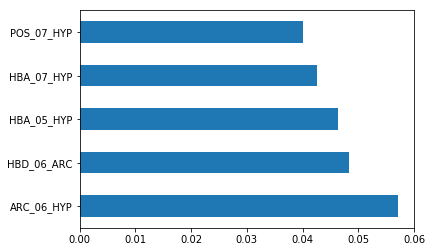

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [9]:
x_train = x_train[['POS_07_HYP', 'HBA_07_HYP', 'HBA_05_HYP', 'HBD_06_ARC', 'HBA_06_HYP']]

x_test = x_test[['POS_07_HYP', 'HBA_07_HYP', 'HBA_05_HYP', 'HBD_06_ARC', 'HBA_06_HYP']]

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.nadam(lr=.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train,
          epochs=5,
          batch_size=128)

Epoch 1/5
56/56 [==============================] - 0s 8ms/step - loss: 0.6895 - acc: 0.1607
Epoch 2/5
56/56 [==============================] - 0s 145us/step - loss: 0.6500 - acc: 0.9107
Epoch 3/5
56/56 [==============================] - 0s 135us/step - loss: 0.6124 - acc: 0.9107
Epoch 4/5
56/56 [==============================] - 0s 179us/step - loss: 0.5607 - acc: 0.9107
Epoch 5/5
56/56 [==============================] - 0s 138us/step - loss: 0.4908 - acc: 0.9107


In [22]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Score', score)

13/13 [==============================] - 0s 10ms/step
Score [0.4858735203742981, 0.8461538553237915]
